In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('Current_Pro_meta.csv')
df

,Unnamed: 0,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
0,0,Abaddon,all,Melee,150,"Support, Carry, Durable",18,43,60,41.86,False
1,1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",31,75,34,41.33,False
2,2,Ancient Apparition,int,Ranged,675,"Support, Disabler, Nuker",53,113,95,46.90,False
3,3,Anti-Mage,agi,Melee,150,"Carry, Escape, Nuker",33,72,234,45.83,False
4,4,Arc Warden,agi,Ranged,625,"Carry, Escape, Nuker",10,18,54,55.56,False
...,...,...,...,...,...,...,...,...,...,...,...
119,119,Windranger,all,Ranged,600,"Carry, Support, Disabler, Escape, Nuker",154,291,621,52.92,False
120,120,Winter Wyvern,all,Ranged,425,"Support, Disabler, Nuker",15,35,209,42.86,False
121,121,Witch Doctor,int,Ranged,550,"Support, Nuker, Disabler",77,166,68,46.39,False
122,122,Wraith King,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator",61,111,42,54.95,True


In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.sort_values('Win Rate', ascending = False)

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
106,Treant Protector,str,Melee,150,"Support, Initiator, Durable, Disabler, Escape",59,85,40,69.41,True
52,Lone Druid,all,Ranged,550,"Carry, Pusher, Durable",28,43,205,65.12,False
16,Chen,all,Ranged,650,"Support, Pusher",43,68,224,63.24,False
83,Riki,agi,Melee,150,"Carry, Escape, Disabler",62,102,221,60.78,False
64,Naga Siren,agi,Melee,150,"Carry, Support, Pusher, Disabler, Initiator, E...",107,180,618,59.44,False
...,...,...,...,...,...,...,...,...,...,...
74,Phantom Assassin,agi,Melee,150,"Carry, Escape",100,240,172,41.67,False
91,Slardar,str,Melee,150,"Carry, Durable, Initiator, Disabler, Escape",37,89,56,41.57,False
107,Troll Warlord,agi,Ranged,500,"Carry, Pusher, Disabler, Durable",56,135,187,41.48,False
1,Alchemist,str,Melee,150,"Carry, Support, Durable, Disabler, Initiator, ...",31,75,34,41.33,False


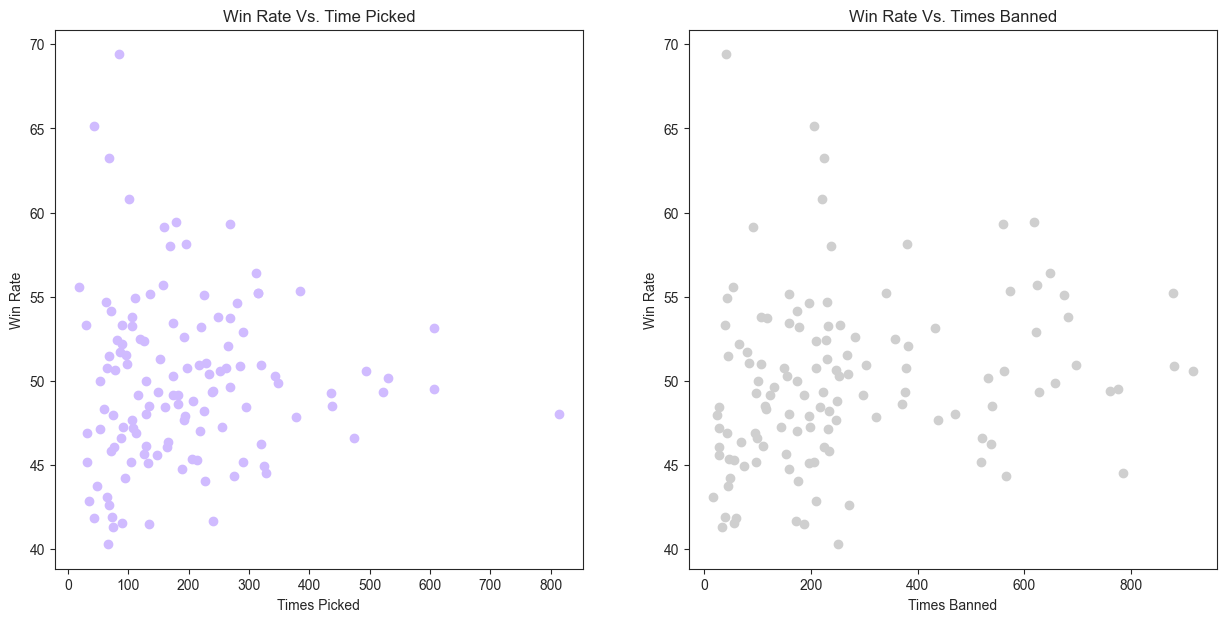

C:\Users\Brendan TM\AppData\Local\Temp\ipykernel_28068\3930296143.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Niche Hero?', y = 'Win Rate', palette = colors)
C:\Users\Brendan TM\AppData\Local\Temp\ipykernel_28068\3930296143.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data = df, x = 'Niche Hero?', y = 'Win Rate', palette = colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


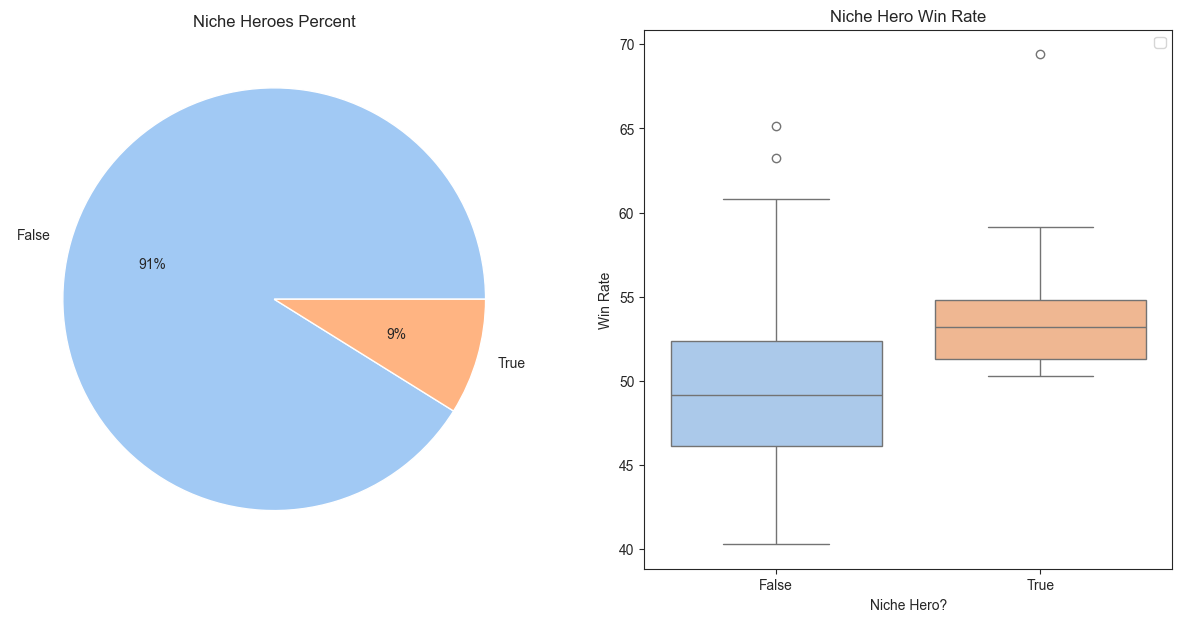

In [7]:
sns.set_style('ticks')
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].scatter(data = df, x = 'Times Picked',  y = 'Win Rate', color = colors[4])
ax[0].set_xlabel('Times Picked')
ax[0].set_ylabel('Win Rate')
ax[0].set_title('Win Rate Vs. Time Picked')

ax[1].scatter(data = df, x = 'Times Banned',  y = 'Win Rate', color = colors[7])
ax[1].set_xlabel('Times Banned')
ax[1].set_ylabel('Win Rate')
ax[1].set_title('Win Rate Vs. Times Banned')
plt.show()

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].pie(x = df['Niche Hero?'].value_counts(), 
          labels = df['Niche Hero?'].value_counts().index,
          colors = colors,
          autopct='%.0f%%')
ax[0].set_title('Niche Heroes Percent')
sns.boxplot(data = df, x = 'Niche Hero?', y = 'Win Rate', palette = colors)
ax[1].set_title('Niche Hero Win Rate')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Primary Attribute'] = le.fit_transform(df['Primary Attribute'])
df['Roles'] = le.fit_transform(df['Roles'])

df.sort_values('Win Rate', ascending = False).head()

,Name,Primary Attribute,Attack Type,Attack Range,Roles,Total Pro wins,Times Picked,Times Banned,Win Rate,Niche Hero?
106,Treant Protector,3,Melee,150,88,59,85,40,69.41,True
52,Lone Druid,1,Ranged,550,39,28,43,205,65.12,False
16,Chen,1,Ranged,650,99,43,68,224,63.24,False
83,Riki,0,Melee,150,15,62,102,221,60.78,False
64,Naga Siren,0,Melee,150,53,107,180,618,59.44,False


Linear Regression

In [9]:
label = df['Win Rate']
feature = df[['Primary Attribute', 'Roles', 'Total Pro wins', 'Times Picked', 'Times Banned','Win Rate', 'Niche Hero?']]

print("Label: ")
print(label.head())
print("\nFeature: ")
print(feature.head())

Label: 
0    41.86
1    41.33
2    46.90
3    45.83
4    55.56
Name: Win Rate, dtype: float64

Feature: 
   Primary Attribute  Roles  Total Pro wins  Times Picked  Times Banned  \
0                  1     75              18            43            60   
1                  3     50              31            75            34   
2                  2     79              53           113            95   
3                  0     19              33            72           234   
4                  0     19              10            18            54   

   Win Rate  Niche Hero?  
0     41.86        False  
1     41.33        False  
2     46.90        False  
3     45.83        False  
4     55.56        False  


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

print("Jumlah data pelatihan: ", len(X_train))
print("Jumlah data pengujian: ", len(X_test))

Jumlah data pelatihan:  99
Jumlah data pengujian:  25


In [11]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X_train, y_train,)

print("Koefisien regresi: ", model_LR.coef_)
print("Intersep: ", model_LR.intercept_)

Koefisien regresi:  [ 1.00159972e-16 -1.18178037e-16  5.11689215e-16 -3.57027775e-16
  3.96817995e-17  1.00000000e+00  1.32183727e-16]
Intersep:  -7.105427357601002e-15


In [12]:
LRpredictions = model_LR.predict(X_test)
mae_LR = mean_absolute_error(y_test, LRpredictions)
mse_LR = mean_squared_error(y_test, LRpredictions)
r2_LR = r2_score(y_test, LRpredictions)
print("Mean Absolute Error:", mae_LR)
print("Mean Squared Error:", mse_LR)
print("R-squared:", r2_LR)

Mean Absolute Error: 9.094947017729283e-15
Mean Squared Error: 1.7367561689345796e-28
R-squared: 1.0


Random Forest Regressor

In [13]:
X = df[['Primary Attribute', 'Roles', 'Total Pro wins', 'Times Picked', 'Times Banned','Win Rate', 'Niche Hero?']]
y = df['Win Rate']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data pelatihan: ", len(X_train))
print("Jumlah data pengujian: ", len(X_test))

Jumlah data pelatihan:  99
Jumlah data pengujian:  25


In [15]:

model_RFR = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
model_RFR.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [16]:
RFRpredictions = model_RFR.predict(X_test)
mae_RFR = mean_absolute_error(y_test, RFRpredictions)
mse_RFR = mean_squared_error(y_test, RFRpredictions)
r2_RFR = r2_score(y_test, RFRpredictions)
oob_score = model_RFR.oob_score_
print("Mean Absolute Error:", mae_RFR)
print("Mean Squared Error:", mse_RFR)
print("R-squared:", r2_RFR)
print(f'Out-of-Bag Score: {oob_score}')

Mean Absolute Error: 0.11581599999999867
Mean Squared Error: 0.025276352799996932
R-squared: 0.9980100731907477
Out-of-Bag Score: 0.9746076559641587


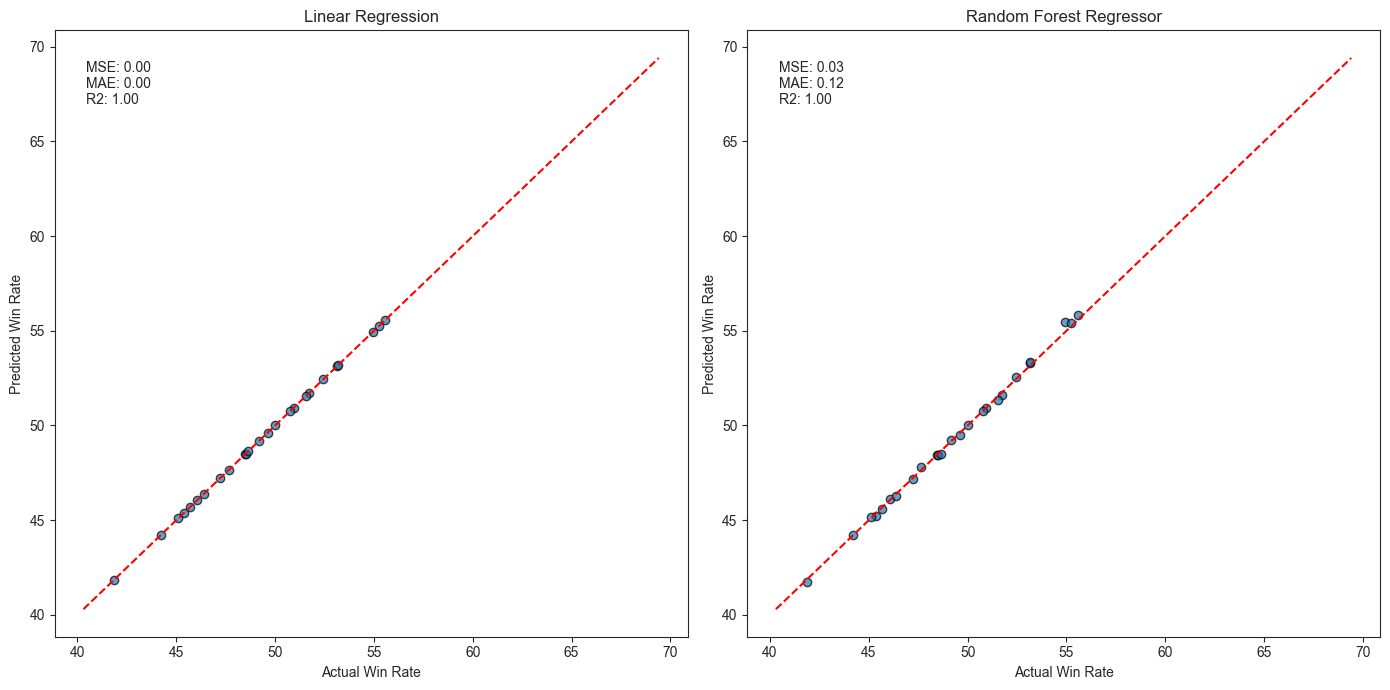

In [17]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(y_test, LRpredictions, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.title('Linear Regression')
plt.text(0.05, 0.95, f'MSE: {mse_LR:.2f}\nMAE: {mae_LR:.2f}\nR2: {r2_LR:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

# Plot Random Forest Regressor results
plt.subplot(1, 2, 2)
plt.scatter(y_test, RFRpredictions, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.title('Random Forest Regressor')
plt.text(0.05, 0.95, f'MSE: {mse_RFR:.2f}\nMAE: {mae_RFR:.2f}\nR2: {r2_RFR:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [18]:
hero_names = ['Ember Spirit', 'Earth Spirit', 'Phantom Assassin', 'Vengeful Spirit', 'Void Spirit']

filtered_heroes = df[df['Name'].isin(hero_names)]

new_heroes = filtered_heroes[['Primary Attribute', 'Roles', 'Total Pro wins', 'Times Picked', 'Times Banned', 'Win Rate', 'Niche Hero?']]

new_heroes = new_heroes.dropna()

predictions = model_LR.predict(new_heroes)

print(f"Prediksi Kemenangan Menggunakan Linear Regression")

for i, prediction in enumerate(predictions):
    print(f"Hero {i+1}: {prediction:.3f}")

average_win_rate = sum(predictions) / len(predictions)
print(f"Prediksi persentase kemenangan tim secara keseluruhan: {average_win_rate:.3f}")

print(f"\n")

predictions = model_RFR.predict(new_heroes)

print(f"Prediksi Kemenangan Menggunakan Random Forest Regressor")

for i, prediction in enumerate(predictions):
    print(f"Hero {i+1}: {prediction:.3f}")

average_win_rate = sum(predictions) / len(predictions)
print(f"Prediksi persentase kemenangan tim secara keseluruhan: {average_win_rate:.3f}")

Prediksi Kemenangan Menggunakan Linear Regression
Hero 1: 50.290
Hero 2: 49.330
Hero 3: 41.670
Hero 4: 47.940
Hero 5: 49.140
Prediksi persentase kemenangan tim secara keseluruhan: 47.674


Prediksi Kemenangan Menggunakan Random Forest Regressor
Hero 1: 50.274
Hero 2: 49.357
Hero 3: 41.615
Hero 4: 47.936
Hero 5: 49.181
Prediksi persentase kemenangan tim secara keseluruhan: 47.672


In [19]:
import pickle

with open('model_LR.pkl', 'wb') as f:
    pickle.dump(model_LR, f)

with open('model_RFR.pkl', 'wb') as f:
    pickle.dump(model_RFR, f)
